# Index
 - Loading dataset
 - Annotomy of MNIST dataset
 - Data normalization
 - Creating model
 - Compile model
 - Train or Fit model
 - Evaluating Model
 - Visualizing the training process
 - Save and load model
 - Test a single image

# GPU testing

In [3]:
import tensorflow as tf
visible_devices = tf.config.get_visible_devices()
for devices in visible_devices:
  print(devices)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [24]:
tf.test.is_gpu_available(
  cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [23]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [5]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [10]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
sess

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce MX330, pci bus id: 0000:2b:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



# Loading  dataset
MNIST dataset, which contains 70000 28x28 grayscale images with 10 different classes. Keras splits it in a training set with 60000 instances and a testing set with 10000 instances.

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Anatomy of MNIST dataset

In [5]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape : (10000, 28, 28)
y_test shpae : (10000,)


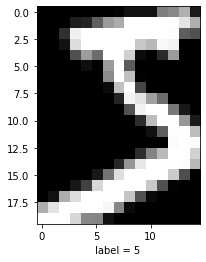

In [17]:
# plot some data
from matplotlib import pyplot as plt
#print(x_train[0])
image = x_train[0][5:25,5:20] 
label = y_train[0]
plt.imshow(image, cmap='gray')
plt.xlabel('label = {}'.format(label))
plt.show()

In [0]:
# print(x_train[0])

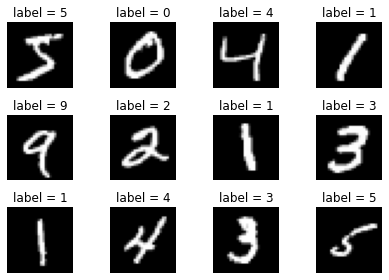

In [19]:
import os
ROW = 3
COLUMN = 4
for i in range(ROW * COLUMN):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(image, cmap='gray')
    plt.title('label = {}'.format(label))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
img_dir = 'images/'
if not os.path.exists(img_dir):
    #print("Hello")
    os.makedirs(img_dir)
plt.savefig(img_dir + "mnist_plot.png")
plt.show()

# Data normalization

In [21]:
# do some preprocessing on data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [22]:
print('after preprocess new shape of data:')
print('*' * 35)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shpae :', y_test.shape)

after preprocess new shape of data:
***********************************
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape : (10000, 28, 28, 1)
y_test shpae : (10000,)


In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Creating model

# Creating a model with the sequential API
The easiest way of creating a model in Keras is by using the `sequential API`, which lets you stack one layer after the other. The problem with the sequential API is that `it doesn’t allow models to have multiple inputs or outputs`, which are needed for some problems.

Nevertheless, the sequential API is a perfect choice for most problems.

To create a convolutional neural network we only need to create a Sequential object and use the add function to add layers.

In [23]:
import os 
os.environ['TF_CPP_LOG_LEVEL'] = "1" # ignore tensorflwo worning

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

The sequential API also supports another syntax where the layers are passed to the constructor directly.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
print(x_train.shape)
model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])


(60000, 28, 28, 1)


# Creating a model with the Functional API
Alternatively, the functional API allows you to create the same models but offers you more flexibility at the cost of simplicity and readability.

It `can be used with multiple input and output layers as well as shared layers`, which enables you to build really complex network structures.

When using the `functional API` we always need to pass the previous layer to the current layer. It also requires the use of an input layer.

In [24]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

# Compile a model
Before we can start training our model we need to configure the learning process. For this, we need to specify an optimizer, a loss function and optionally some metrics like accuracy.

The `loss function` is a measure on how good our model is at achieving the given objective.

An `optimizer` is used to minimize the loss(objective) function by updating the weights using the gradients

In [25]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)         

# Train or Fit model

In [26]:
import keras.callbacks
callbacks = [
    keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_logs",
    histogram_freq=0,  # How often to log histogram visualizations
    embeddings_freq=0,  # How often to log embedding visualizations
    update_freq="epoch",
    )  
    
]
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5, batch_size=512, callbacks=callbacks, validation_split = .2)

Epoch 1/5
 1/94 [..............................] - ETA: 0s - loss: 2.3003 - accuracy: 0.1152WARNING:tensorflow:From C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
94/94 [==============================] - 57s 603ms/step - loss: 0.5897 - accuracy: 0.8060 - val_loss: 0.1026 - val_accuracy: 0.9685
Epoch 2/5
94/94 [==============================] - 58s 616ms/step - loss: 0.1364 - accuracy: 0.9586 - val_loss: 0.0674 - val_accuracy: 0.9787
Epoch 3/5
94/94 [==============================] - 59s 625ms/step - loss: 0.0904 - accuracy: 0.9723 - val_loss: 0.0474 - val_accuracy: 0.9868
Epoch 4/5
94/94 [==============================] - 60s 634ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0408 - val_accuracy: 0.9881
Epoch 5/5
94/94 [==============================] - 59s 625ms/step - l

In [22]:
epochs = 5
history = model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1998 - accuracy: 0.93720s - loss: 0.203
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0725 - accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0549 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0481 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0428 - accuracy: 0.9874


# Evaluating Mode
Finally, you may evaluate the trained model with x_test and y_test using one line of code:

In [ ]:
model.evaluate(x_test, y_test)

In [0]:
# You can see we have got 99% accuracy on test data

# Visualizing the training process
We can visualize our training and testing accuracy and loss for each epoch so we can get intuition about the performance of our model. The accuracy and loss over epochs are saved in the history variable we got whilst training and we will use Matplotlib to visualize this data

In [ ]:
plt.plot(history.history['acc'], label='training accuracy')
# plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

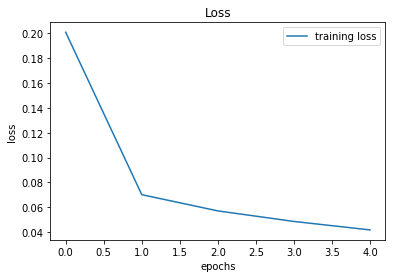

In [0]:
plt.plot(history.history['loss'], label='training loss')
# plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Save and load model

In [0]:
import os

model_name = 'mnist_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
!ls -ltr


model saved to /content
total 5556
drwxr-xr-x 1 root root    4096 Jun 18 16:14 sample_data
-rw-r--r-- 1 root root 2841808 Jul  7 10:58 mnist_cls.h5
-rw-r--r-- 1 root root 2841808 Jul  7 11:12 mnist_clf.h5


In [0]:
from keras.models import load_model

loaded_model = load_model(model_name)
# model.summary()

# Test a single image

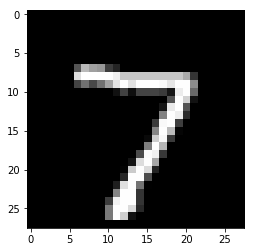

In [0]:
image_index = 0 # 4444
test_image = x_test[image_index].reshape(28, 28)
plt.imshow(test_image, cmap='gray')


In [0]:
test_image = test_image.reshape(1, 28, 28, 1) # make image batch

pred = loaded_model.predict(test_image)       # prediction

print('pred lenght:', len(pred[0]))
best_prediction = pred.argmax()
print('best_prediction', best_prediction)

pred lenght: 10
best_prediction 7


# Hard Sampe for recognition

In [0]:
import numpy as np

def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=5):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Showing max 5 first failures. The predicted class is shown first and the correct class in parenthesis.


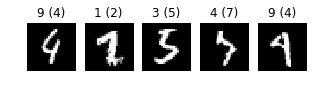

In [0]:
predictions = loaded_model.predict(x_test)

show_failures(predictions)